In [3]:
import numpy as np
import pandas as pd
from BenchmarkDataset import *
from animate_path import animate_path
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


In [4]:
swarm_1_params = PyswarmParameters(cognitive_param=0.5, social_param=0.3, inertia=.93, n_particles=20,
                                  iters=100, trajectory_vector = [0,1], start_point = [0,0])

swarm_2_params = PyswarmParameters(cognitive_param=0.3, social_param=0.1, inertia=.92, n_particles=30,
                                  iters=100, trajectory_vector = [0.5,1], start_point = [0,0])


swarm_3_params = PyswarmParameters(cognitive_param=0.1, social_param=0.5, inertia=.93, n_particles=10,
                                  iters=100, trajectory_vector = [-1,1], start_point = [0,0])


BD = BenchmarkDataset([swarm_1_params, swarm_2_params, swarm_3_params])
BD.create_moving_swarms()
BD.create_swarm_df()

2022-01-20 17:31:54,381 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.93}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=2.88e-7
2022-01-20 17:31:54,509 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.884948924342288e-07, best pos: [0.00026118 0.00046934]
2022-01-20 17:31:54,518 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.1, 'w': 0.92}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=1.83e-7
2022-01-20 17:31:54,631 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8303460604923193e-07, best pos: [ 1.08786112e-06 -4.27824056e-04]
2022-01-20 17:31:54,644 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.1, 'c2': 0.5, 'w': 0.93}
pyswarms.single.global_best: 100%|████████████████████|100/100, best_cost=7.8e-6
2022-01-20 17:31:54,733 - pyswarms.single.global_best - INFO 

2022-01-20 17:31:55,084 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


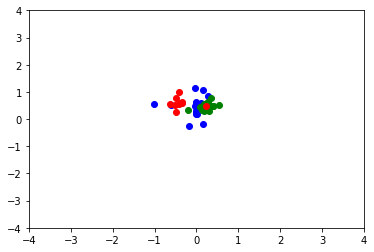

In [5]:
animate_path(BD.swarm_list, anim_frames = 50, anim_interval = 100, colors = ['b', 'g', 'r'])

In [6]:
from TKM import TKM

In [7]:
data = np.transpose(np.hstack((np.hstack((np.array(BD.swarm_list[0]), 
                                          np.array(BD.swarm_list[1]))), 
                               np.array(BD.swarm_list[2]))), axes = [0,2,1])

t,m,n = data.shape

Iteration 100
Maximum number of iterations


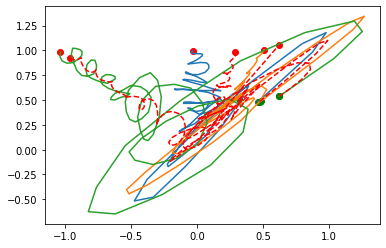

In [8]:
tkm = TKM(data)
# tkm.perform_clustering_center_derivative(k=3, lam = 0.80, gamma = 0.50, max_iter = 100)
tkm.perform_clustering_constant_weights(k=3, lam = .80)
plt.figure()
for i in range(3):
    swarm = BD.swarm_list[i]
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')

plt.plot(tkm.centers[:, 0, 2], tkm.centers[:,1,2], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,2], tkm.centers[0,1,2], c = 'g')
plt.scatter(tkm.centers[-1,0,2], tkm.centers[-1,1,2], c = 'r')


In [9]:
# def simplex_prox(z: np.ndarray, a: int) -> np.ndarray:
#     """
#     Project onto simplex.

#     Args:
#         z (np.ndarray): Matrix to be projected onto the simplex. Matrix must be of size time_steps x number of particles x dimension.
#         a (int): Simplex to be projected onto.

#     Returns:
#         (np.ndarray): Projection of matrix z onto the a simplex.
#     """
#     u = z.copy()
#     u[..., ::-1].sort(axis=2)
#     j = np.arange(u.shape[2])
#     v = (a - np.cumsum(u, axis=2)) / (j + 1)
#     i = np.repeat(j[None, :], u.shape[1], axis=0)
    
#     rho = np.max(i * (u + v > 0), axis=2)
    
#     lam = v[
#         np.repeat(np.arange(u.shape[0]), u.shape[1]),
#         np.tile(np.arange(u.shape[1]), u.shape[0]),
#         rho.flatten(),
#     ]
    
#     print(lam.shape, '\n\n', lam, '\n\n')
    
#     lam = lam.reshape(u.shape[0], u.shape[1], 1)
    
#     print('\n\n lam', lam, '\n\n')
#     return np.maximum(z + lam, 0.0)

# def simplex_prox_2d(z: np.ndarray, a: float) -> np.ndarray:
#     """
#     Project onto simplex.

#     Args:
#         z:  Variable to be projected. Assume ``x`` is a matrix, each row will be projected onto a simplex.
#         a:  Simplex to be projected onto.
#     Returns:
#         np.maximum(z + lam, 0.0) (np.ndarray): Projected variable.
#     """
#     u = z.copy()

#     if u.ndim == 1:
#         u = u[np.newaxis,:]

#     u[:, ::-1].sort(axis=1)

#     j = np.arange(u.shape[1])
#     v = (a - np.cumsum(u, axis=1))/(j + 1)

#     i = np.repeat(j[None, :], u.shape[0], axis=0)
#     rho = np.max(i*(u + v > 0), axis=1)
    
#     lam = v[np.arange(u.shape[0]), rho][:, None]
    
# #     print('\n\n lam', lam, '\n\n')
#     return np.maximum(z + lam, 0.0)

# def simplex_prox_any_size(z: np.ndarray, a: int) -> np.ndarray:
#     """
#     Project onto simplex.

#     Args:
#         z (np.ndarray): Matrix to be projected onto the simplex. Matrix must be of size time_steps x number of particles x dimension.
#         a (int): Simplex to be projected onto.

#     Returns:
#         (np.ndarray): Projection of matrix z onto the a simplex.
#     """
#     u = z.copy()
#     u[..., ::-1].sort(axis=-1)
#     j = np.arange(u.shape[-1])
#     v = (a - np.cumsum(u, axis=-1)) / (j + 1)
#     i = np.repeat(j[None, :], u.shape[-2], axis=0)
#     rho = np.max(i * (u + v > 0), axis=-1)
#     lam = v[
#         np.repeat(np.arange(u.shape[0]), u.shape[1
#                                                 ]),
#         np.tile(np.arange(u.shape[1]), u.shape[0]),
#         rho.flatten(),
#     ].reshape(u.shape[0], u.shape[1], 1)
#     return np.maximum(z + lam, 0.0)

In [10]:
# # x = np.random.rand(t,m,n)
# w = np.random.rand(2,5,3)

# print('w', w, '\n\n')

# print(simplex_prox_2d(w[0], 1))

# print('\n\n', simplex_prox(w,1))
# u = w.copy()
# print(w)

# w[...,::-1].sort(axis = 2)
# print('\n\n w ', w)

# u[:,:,::-1].sort(axis = -1)

# print('\n\n u', u)

# print(w==u)

In [11]:
football = pd.read_csv('tracking2018.csv')

In [12]:
football['time'].unique()

array(['2018-12-30T21:25:32.200', '2018-12-30T21:25:32.300',
       '2018-12-30T21:25:32.400', ..., '2018-09-11T05:25:18.000',
       '2018-09-11T05:25:18.100', '2018-09-11T05:25:18.200'], dtype=object)

In [13]:
football['date'] = pd.to_datetime(football['time']).dt.date
football['time'] = pd.to_datetime(football['time']).dt.time

In [14]:
football.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [15]:
games = football['gameId'].unique()
single_game = football[football['gameId'] == games[0]]
single_game.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [16]:
single_game['playId'].unique()

array([  36,  373,  392,  548,  564,  787,  803,  892, 1069, 1085, 1267,
       1538, 1557, 1976, 2165, 2314, 2351, 2502, 2554, 2570, 2860, 2883,
       2975, 3106, 3378, 3397, 3732, 3751, 4006, 4029, 4148])

In [37]:
import datetime
single_play = single_game[single_game['playId']==36]
single_play.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [38]:
single_play.dropna(inplace=True)
single_play = single_play.sort_values(by=['time', 'nflId'])
single_play.head()

# for time in single_play['time'].unique():
#     single_play[single_play['time'] == time]

/opt/anaconda3/envs/tkm/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
105,21:25:32.200000,62.04,14.23,0.07,0.52,0.00,272.98,325.00,None,40579.0,Ray-Ray Armstrong,52.0,OLB,away,1,2018123000,36,right,2018-12-30
210,21:25:32.200000,61.62,5.06,0.08,0.14,0.01,334.89,246.70,None,41316.0,Phillip Gaines,33.0,CB,away,1,2018123000,36,right,2018-12-30
315,21:25:32.200000,44.22,37.38,0.11,0.11,0.02,156.01,106.88,None,42398.0,Maxx Williams,87.0,TE,home,1,2018123000,36,right,2018-12-30
420,21:25:32.200000,43.83,42.43,0.15,0.17,0.02,104.41,84.56,None,42437.0,Ty Montgomery,88.0,RB,home,1,2018123000,36,right,2018-12-30


In [39]:
home = single_play[single_play['team'] == 'home']
away = single_play[single_play['team'] == 'away']

home_players = home['nflId'].nunique()
away_players = home['nflId'].nunique()

home_list = []
times = home['time'].unique()
for time in times:
    #positions in order by player
    home_list.append(home[home['time'] == time][['x', 'y']].to_numpy())

away_list = []
for time in away['time'].unique():
    #positions in order by player
    away_list.append(away[away['time'] == time][['x', 'y']].to_numpy())    

positions = [home_list, away_list]


2022-01-20 17:36:32,669 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


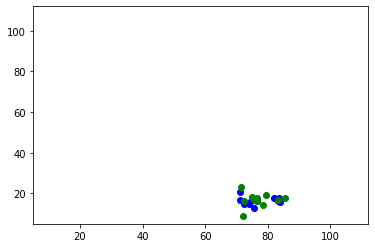

In [40]:
animate_path(positions, anim_frames = len(times), anim_interval = 100, colors = ['b', 'g', 'r'])

In [41]:
data = np.transpose(np.hstack((np.array(positions[0]), 
                                          np.array(positions[1]))), axes = [0,2,1])

t,m,n = data.shape

Iteration 100


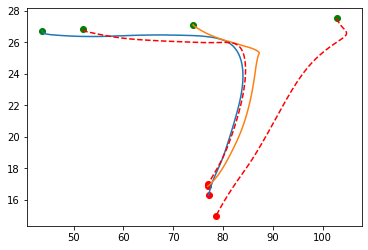

In [50]:
tkm = TKM(data)
# tkm.perform_clustering_center_derivative(k=2, lam = .80, gamma = 0, max_iter = 50000)
tkm.perform_clustering_constant_weights(k=2, lam = .80, max_iter = 5000)

plt.figure()
for i in range(2):
    swarm = np.array(positions[i])
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')



(22,)


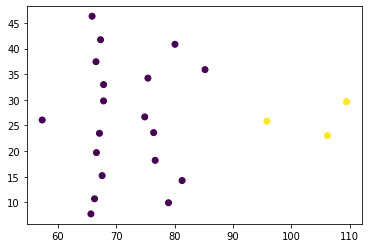

In [55]:
iteration = 40
assignment = np.where(tkm.weights == 0)[1]
print(assignment.shape)
plt.scatter(data[iteration,0,:], data[iteration,1,:], c = assignment)
plt.savefig('assignment_t10')

In [173]:
from SpectralFunctions import *

U = data[0,:,:]
m,n = U.shape

print(U.shape)

(2, 22)


In [194]:
A = AffinityMatrix(U, n, 5)
L = LaplacianMatrix(A)
X, eigvals = EigVecMatrix(L, 2)
normalX = Normalize(X)



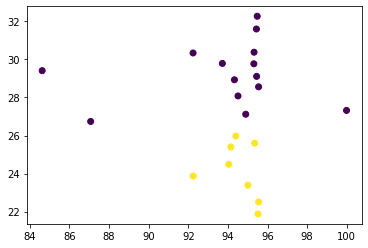

In [200]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0).fit(normalX)

newX = normalX.T

plt.figure()
plt.scatter(U[0,:], U[1,:], c =kmeans.labels_)